In [1]:
import pandas as pd
import numpy as np

df_X = pd.read_csv('matminer_feature.csv')
df_X = df_X.drop(['Unnamed: 0'],axis=1)
x = df_X.values

from sklearn.impute import SimpleImputer

X =  SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(x)

df_y = pd.read_csv('y.csv')
df_y = df_y.drop(['Unnamed: 0'],axis=1)
y = df_y.values

X.shape,y.shape

((3017, 15), (3017, 1))

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [5]:
y_pred = knn.predict(X_test)
y_predprob = knn.predict_proba(X_test)[:,1]

from sklearn import metrics

print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.8013
AUC Score (Train): 0.706364


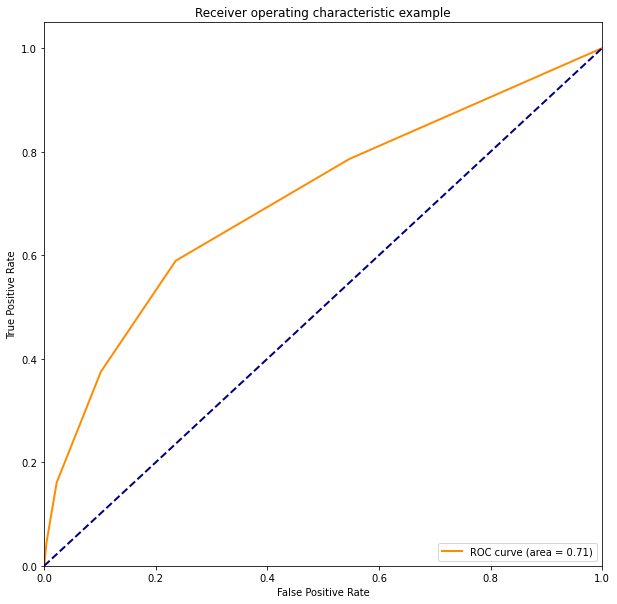

In [6]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predprob)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot  as plt

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_test = {'n_neighbors': range(0,20,1)}
gsearch = GridSearchCV(estimator =KNeighborsClassifier(),param_grid = param_test,scoring='roc_auc',cv=5)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

({'n_neighbors': 10}, 0.6711583464676524)

In [11]:
param_test1 = {'weights': ['uniform','dista']}
gsearch1 = GridSearchCV(estimator =KNeighborsClassifier(n_neighbors=10),param_grid = param_test1,scoring='roc_auc',cv=5)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

({'weights': 'distance'}, 0.684161444794693)

In [18]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [19]:
y_pred1 = knn1.predict(X_test)
y_predprob1 = knn1.predict_proba(X_test)[:,1]

print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred1))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob1))

Accuracy : 0.8162
AUC Score (Train): 0.696655


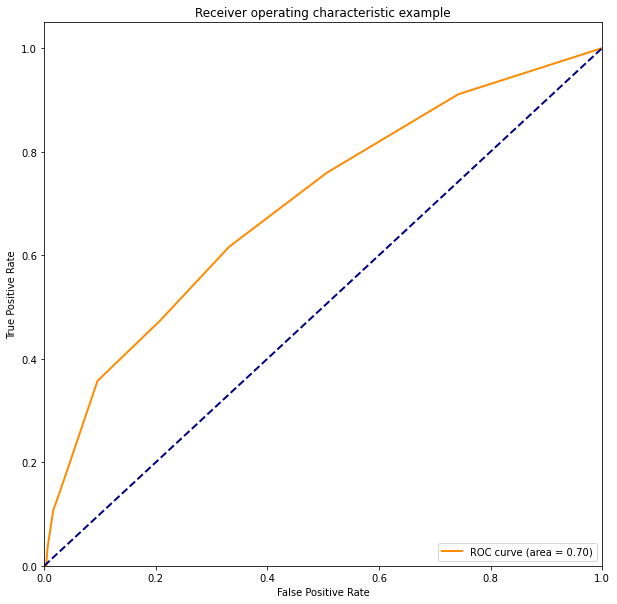

In [20]:
fpr1,tpr1,threshold1=metrics.roc_curve(y_test,y_predprob1)
roc_auc1=metrics.auc(fpr1,tpr1)

plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc1) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()